In [5]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install graphviz

^C

Note: you may need to restart the kernel to use updated packages.


Training Dataset
   AA  A2  A3  A4  A5  A6  LABEL
0   1   2   3   4   5   6      0
1   2   3   4   5   6   7      1
2   3   4   5   6   7   8      0
3   4   5   6   7   8   9      1
4   5   6   7   8   9  10      0
Test Dataset
   AA  A2  A3  A4  A5  A6  LABEL
0   2   3   4   5   6   7      0
1   4   5   6   7   8   9      1
2   6   7   8   9  10  11      0
3   8   9  10  11  12  13      1
4  10  11  12  13  14  15      0
Predicted Labels:
[0 0]
Decision Tree's Accuracy: 0.5
Criterion=gini, Accuracy: 0.5
Criterion=entropy, Accuracy: 0.5


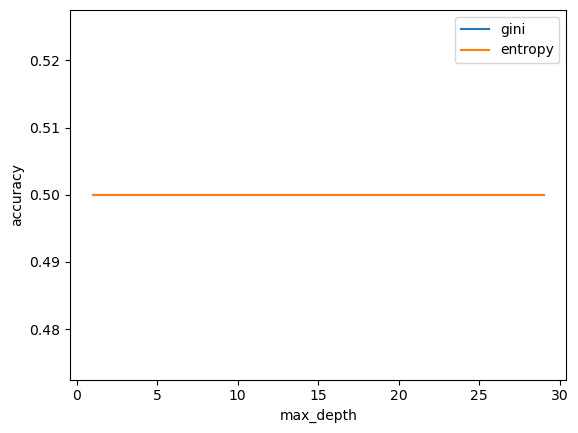

Accuracy after reducing depth and using Entropy: 0.5


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import os
import matplotlib.pyplot as plt

# Read and print the training dataset
traindatainput = pd.read_csv('monks2_train.csv', delimiter=",")
print("Training Dataset")
print(traindatainput)

# Read and print the test dataset
testdatainput = pd.read_csv('monks2_test.csv', delimiter=",")
print("Test Dataset")
print(testdatainput)

# Define the feature columns and target column
X_train = traindatainput[['AA', 'A2', 'A3', 'A4', 'A5', 'A6']].values
Y_train = traindatainput["LABEL"]
X_test = testdatainput[['AA', 'A2', 'A3', 'A4', 'A5', 'A6']].values
Y_test = testdatainput["LABEL"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=3)

# Create a Decision Tree with criterion 'entropy' and max_depth 4
monksTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
monksTree.fit(X_train, Y_train)
predicted = monksTree.predict(X_test)
print("Predicted Labels:")
print(predicted)

# Find and print the accuracy of the decision tree model
accuracy = accuracy_score(Y_test, predicted)
print("Decision Tree's Accuracy:", accuracy)

# Visualize the decision tree using Graphviz
dot_data = StringIO()
export_graphviz(monksTree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=['al', 'a2', 'a3', 'a4', 'a5', 'a6'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

# Try different criteria and check accuracy
monksTree = DecisionTreeClassifier(criterion='gini')
monksTree.fit(X_train, Y_train)
pred = monksTree.predict(X_test)
accuracy_gini = accuracy_score(Y_test, pred)
print('Criterion=gini, Accuracy:', accuracy_gini)

monksTree = DecisionTreeClassifier(criterion='entropy')
monksTree.fit(X_train, Y_train)
pred = monksTree.predict(X_test)
accuracy_entropy = accuracy_score(Y_test, pred)
print('Criterion=entropy, Accuracy:', accuracy_entropy)

# Check if pruning can improve results
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1, 30):
    monksTree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    monksTree.fit(X_train, Y_train)
    pred = monksTree.predict(X_test)
    acc_gini.append(accuracy_score(Y_test, pred))

    monksTree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    monksTree.fit(X_train, Y_train)
    pred = monksTree.predict(X_test)
    acc_entropy.append(accuracy_score(Y_test, pred))

    max_depth.append(i)

d = pd.DataFrame({'acc_gini': pd.Series(acc_gini), 'acc_entropy': pd.Series(acc_entropy), 'max_depth': pd.Series(max_depth)})

# Visualize changes in parameters
plt.plot('max_depth', 'acc_gini', data=d, label='gini')
plt.plot('max_depth', 'acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Check accuracy with a shorter tree (max depth of 7) and criterion of entropy
monksTree = DecisionTreeClassifier(criterion='entropy', max_depth=7)
monksTree.fit(X_train, Y_train)
pred = monksTree.predict(X_test)
accuracy_pruned = accuracy_score(Y_test, pred)
print("Accuracy after reducing depth and using Entropy:", accuracy_pruned)